In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("/content/credit_card_fraud_10k.csv")

In [3]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [5]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [7]:
df = pd.get_dummies(df, columns=["merchant_category"], drop_first=True)

In [8]:
X = df.drop(["is_fraud", "transaction_id"], axis=1)
y = df["is_fraud"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
iso_model = IsolationForest(
    n_estimators=150,
    contamination=0.02,   # expected fraud %
    random_state=42
)

iso_model.fit(X_scaled)

IsolationForest(contamination=0.02, n_estimators=150, random_state=42)

In [11]:
predictions = iso_model.predict(X_scaled)

In [13]:
df["predicted_fraud"] = np.where(predictions == -1, 1, 0) #Recall for fraud (VERY important),Handling imbalanced data,Practical evaluation

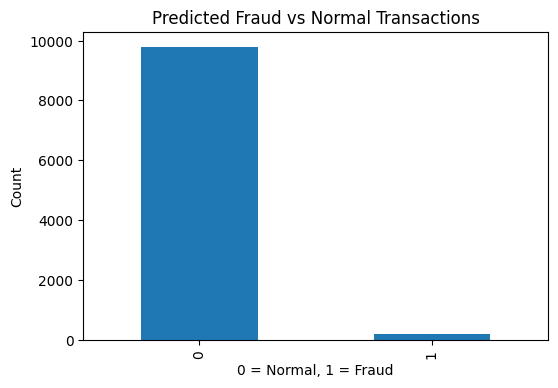

In [14]:
plt.figure(figsize=(6,4))
df["predicted_fraud"].value_counts().plot(kind="bar")
plt.title("Predicted Fraud vs Normal Transactions")
plt.xlabel("0 = Normal, 1 = Fraud")
plt.ylabel("Count")
plt.show()

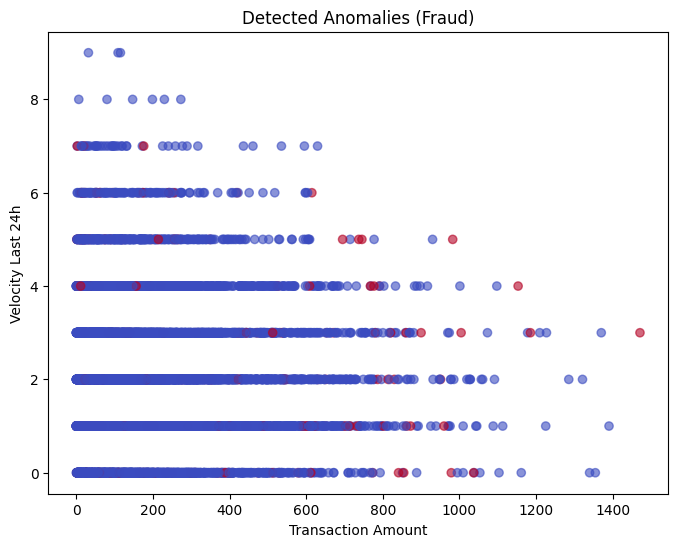

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df["amount"], df["velocity_last_24h"],
            c=df["predicted_fraud"], cmap="coolwarm", alpha=0.6)

plt.xlabel("Transaction Amount")
plt.ylabel("Velocity Last 24h")
plt.title("Detected Anomalies (Fraud)")
plt.show()

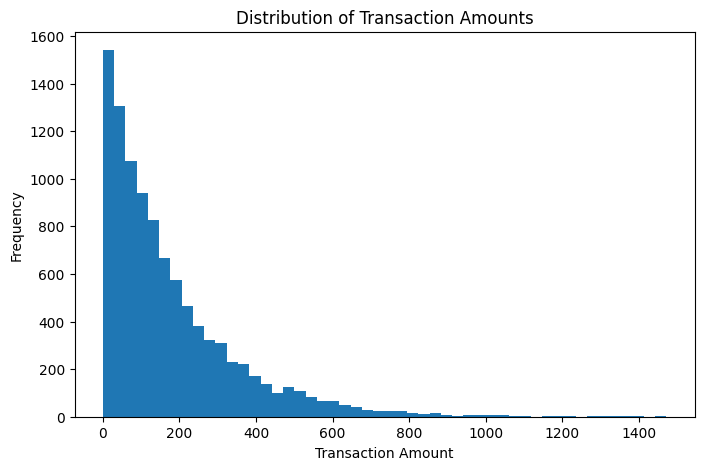

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['amount'], bins=50)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()


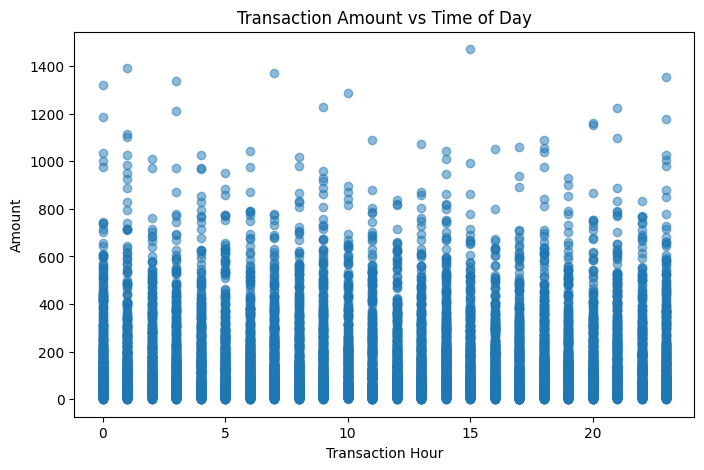

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df['transaction_hour'], df['amount'], alpha=0.5)
plt.xlabel("Transaction Hour")
plt.ylabel("Amount")
plt.title("Transaction Amount vs Time of Day")
plt.show()

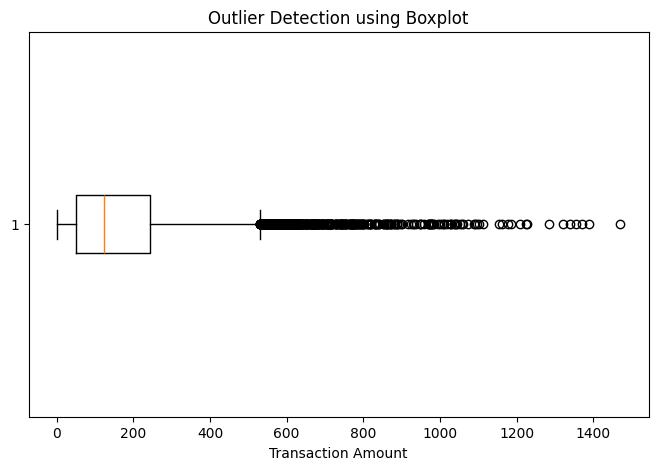

In [18]:
plt.figure(figsize=(8,5))
plt.boxplot(df['amount'], vert=False)
plt.xlabel("Transaction Amount")
plt.title("Outlier Detection using Boxplot")
plt.show()

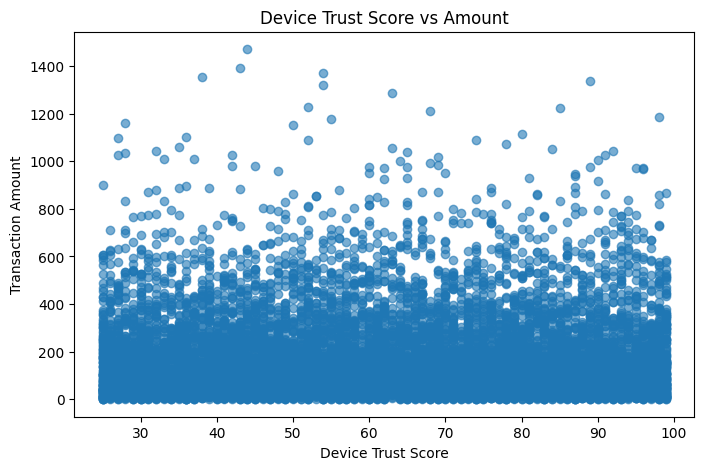

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df['device_trust_score'], df['amount'], alpha=0.6)
plt.xlabel("Device Trust Score")
plt.ylabel("Transaction Amount")
plt.title("Device Trust Score vs Amount")
plt.show()

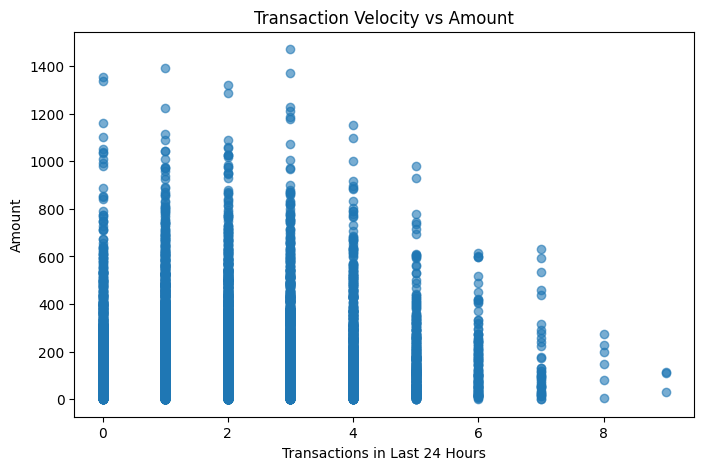

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(df['velocity_last_24h'], df['amount'], alpha=0.6)
plt.xlabel("Transactions in Last 24 Hours")
plt.ylabel("Amount")
plt.title("Transaction Velocity vs Amount")
plt.show()

In [22]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    contamination=0.03,   # ~3% suspicious
    random_state=42
)

df['anomaly'] = model.fit_predict(X_scaled)


In [23]:
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

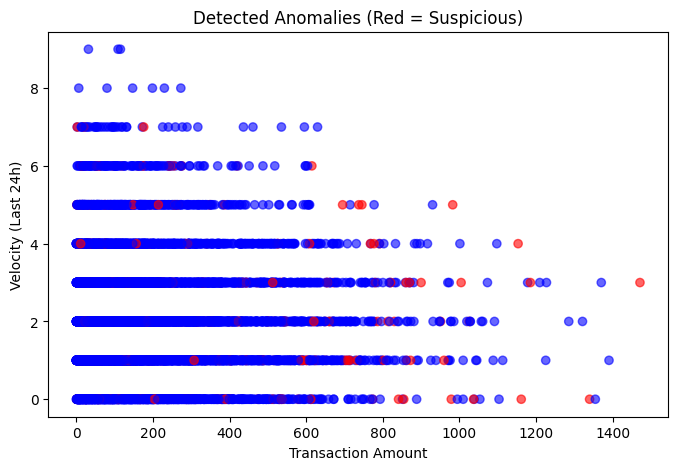

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

colors = df['anomaly'].map({0: 'blue', 1: 'red'})

plt.scatter(
    df['amount'],
    df['velocity_last_24h'],
    c=colors,
    alpha=0.6
)

plt.xlabel("Transaction Amount")
plt.ylabel("Velocity (Last 24h)")
plt.title("Detected Anomalies (Red = Suspicious)")
plt.show()

In [25]:
pd.crosstab(df['is_fraud'], df['anomaly'],
            rownames=['Actual Fraud'],
            colnames=['Detected Anomaly'])

Detected Anomaly,0,1
Actual Fraud,,
0,9622,227
1,78,73
